In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as patches

from PIL import Image

In [11]:
def selection_cells_for_show(image_path, cell_size, cell_count, padding=10):
    image = Image.open(image_path)
    image_np = np.array(image)

    # Получение размеров изображения (высота и ширина)
    img_height, img_width, _ = image_np.shape

    # Создание списка для хранения полученных элементов, а также счетких извлеченных клеток
    cells = []
    extracted_cells = 0
    fig, ax = plt.subplots(1)

    ax.imshow(image_np)

    # Ицкл прохода по изображению клетки с шагом размера ячейки
    for y in range(0, img_height, cell_size):
        for x in range(0, img_width, cell_size):
            if extracted_cells >= cell_count:
                break

            # вырезаем ячейку
            cell = image_np[y:y + cell_size, x:x + cell_size]

            # проверяем, содержит ли ячейка "полезную" информацию
            if cell.mean() < 240:  # порог для фильтрации пустых участков
                cells.append(cell)
                extracted_cells += 1

                # добавляем рамку на исходное изображение для визуализации
                rect = patches.Rectangle((x, y), cell_size, cell_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

    plt.title("Исходное изображение с выделенными ячейками")
    plt.show()

  # Создание мозайки изображений

  # Ограничение количества ячеек (до 16 штук)
    if len(cells) > 16:
        cells = cells[:16]

  # В сулчае, если их менее 16-ти - дублируем ячейку
    elif len(cells) < 16:
        cells = cells * (16 // len(cells)) + cells[:16 % len(cells)]

    # Размер сетки и подготовка мозаики с учетом padding
    grid_size = 4
    mosaic_size = grid_size * cell_size + (grid_size - 1) * padding
    mosaic = np.ones((mosaic_size, mosaic_size, 3), dtype=np.uint8) * 255  # фон белого цвета

    for idx, cell in enumerate(cells):
        i = idx // grid_size
        j = idx % grid_size
        y_start = i * (cell_size + padding)
        x_start = j * (cell_size + padding)
        mosaic[y_start:y_start + cell_size, x_start:x_start + cell_size] = cell

    # Изображение мозайки
    plt.figure(figsize=(8, 8))
    plt.imshow(mosaic)
    plt.axis('off')
    plt.title(f"Изображение для {image_path}")
    plt.show()


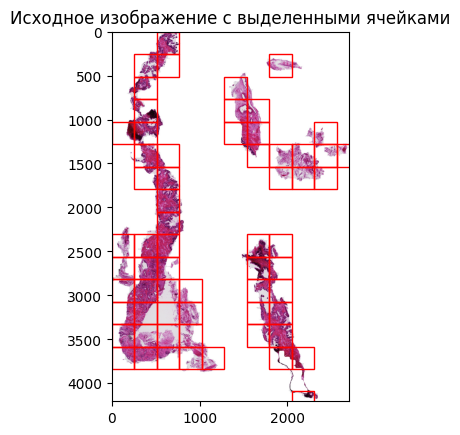

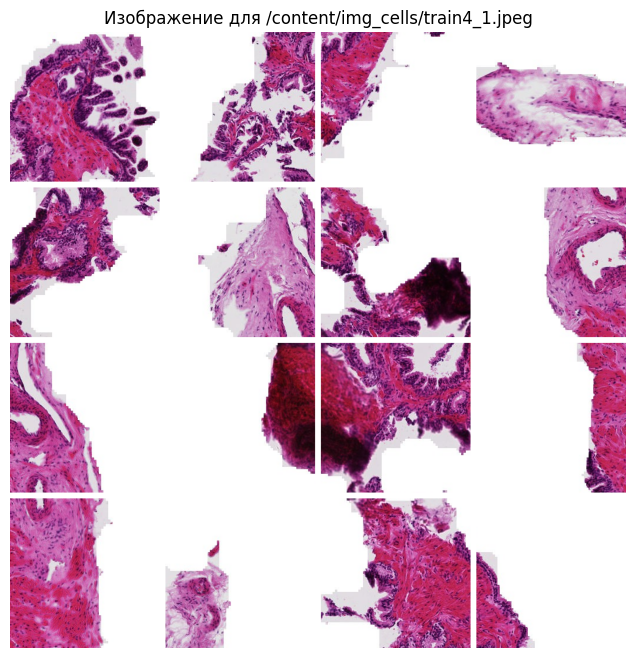

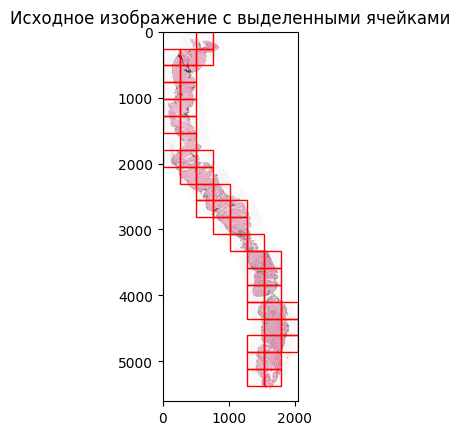

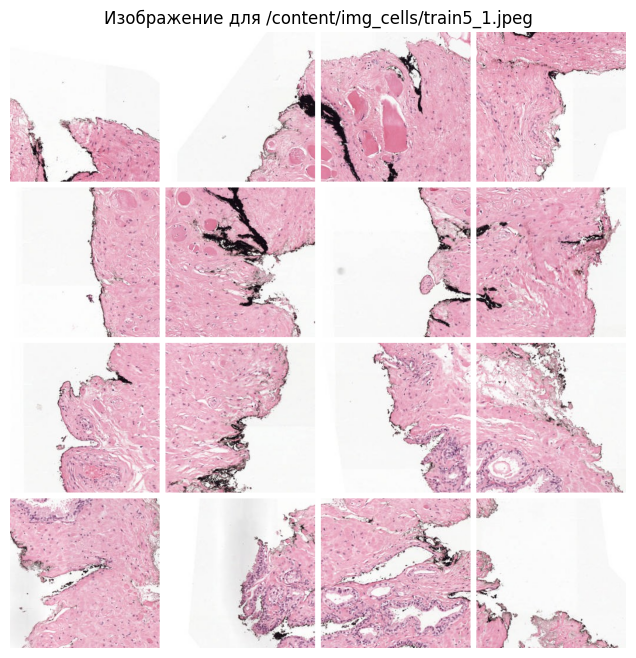

In [18]:
for i in range(4, 6):
  path = f"/content/img_cells/train{i}_1.jpeg"
  selection_cells_for_show(path, cell_size=256, cell_count=64)

# Дополнительный вопрос
Чтобы подобрать подходящие значения аргументов для большинства изображений, можно:

При возможности сделать размеры изображений одинаковыми.

*   Проанализировать размеры изображений, чтобы выбрать подходящий размер ячейки.
*   Оценить среднее количество ячеек с клетками для каждой картинки и установить это значение, чтобы был охват всего изображения.
*   Протестировать на тестовой выборке изображений, корректируя значения параметров вручную.
*   Использовать результаты, чтобы уточнить параметры.







